In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

In [2]:
data, target = load_iris(return_X_y=True)
data = data[:, :2]

In [3]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.2, random_state=1)

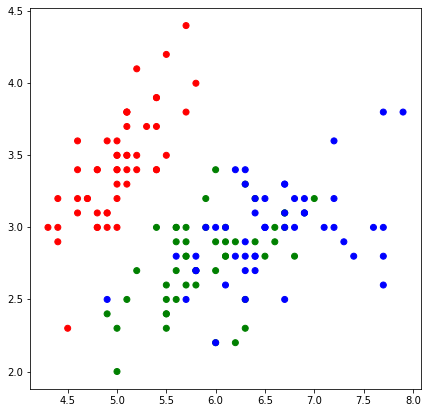

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    """Euclidean distance calculation."""
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
        
    return np.sqrt(distance)

In [6]:
def knn(x_train, y_train, x_test, k):
    """K nearest neighborst searching algorithm."""
    
    answers = []
    for x in x_test:
        test_distances = []
        
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
            
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0: k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [7]:
def accuracy(y_pred, y):
    """Accuracy calculation."""
    
    return (sum(y_pred == y) / len(y))

In [8]:
def get_grid(data, eps=0.01):
    """Classes distribution plotting."""
    
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    
    return np.meshgrid(np.arange(x_min, x_max, eps), np.arange(y_min, y_max, eps))

Точность алгоритма при k = 1: 0.667


<ipython-input-14-e6471d060fba>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)


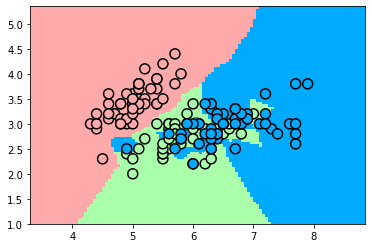

In [14]:
k = 1

y_pred = knn(x_train, y_train, x_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

xx, yy = get_grid(data, eps=.05)
predicted = np.array(knn(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)).reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])

plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=target, s=100, cmap=cmap_light, edgecolors='black', linewidth=1.5)
plt.show()

Точность алгоритма при k = 3: 0.733


<ipython-input-15-53520c31996f>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)


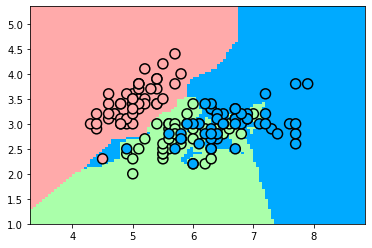

In [15]:
k = 3

y_pred = knn(x_train, y_train, x_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

xx, yy = get_grid(data, eps=.05)
predicted = np.array(knn(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)).reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])

plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=target, s=100, cmap=cmap_light, edgecolors='black', linewidth=1.5)
plt.show()

Точность алгоритма при k = 5: 0.867


<ipython-input-16-617410f11e57>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)


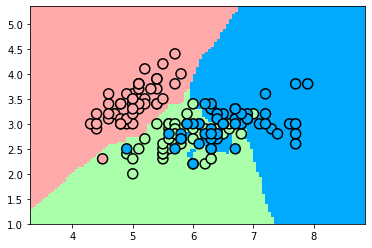

In [16]:
k = 5

y_pred = knn(x_train, y_train, x_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

xx, yy = get_grid(data, eps=.05)
predicted = np.array(knn(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)).reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])

plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=target, s=100, cmap=cmap_light, edgecolors='black', linewidth=1.5)
plt.show()

Точность алгоритма при k = 10: 0.833


<ipython-input-17-5a84334a5830>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)


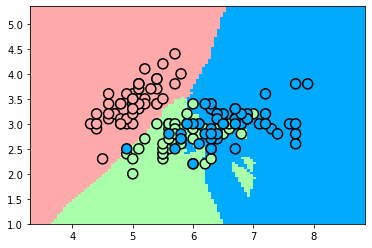

In [17]:
k = 10

y_pred = knn(x_train, y_train, x_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

xx, yy = get_grid(data, eps=.05)
predicted = np.array(knn(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)).reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])

plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=target, s=100, cmap=cmap_light, edgecolors='black', linewidth=1.5)
plt.show()

### 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

In [45]:
def knn_weighted(x_train, y_train, x_test, k, q = 1):
    """K nearest neighborst searching algorithm."""
    
    answers = []
    weights = []
    for x in x_test:
        test_distances = []
        
        for i in range(len(x_train)):
            weights.append(q ** i)
            distance = e_metrics(x, x_train[i]) * weights[i]
            
            test_distances.append((distance, y_train[i]))
            
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0: k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Точность алгоритма при k = 1: 0.667


<ipython-input-46-9b2b8823b1c3>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)


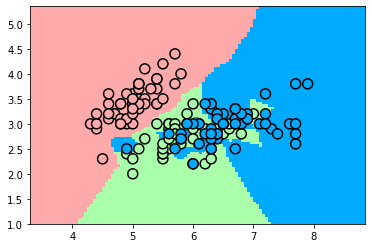

In [46]:
k = 1

y_pred = knn_weighted(x_train, y_train, x_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

xx, yy = get_grid(data, eps=.05)
predicted = np.array(knn_weighted(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)).reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])

plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=target, s=100, cmap=cmap_light, edgecolors='black', linewidth=1.5)
plt.show()

Точность алгоритма при k = 3: 0.733


<ipython-input-47-60f06f201376>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)


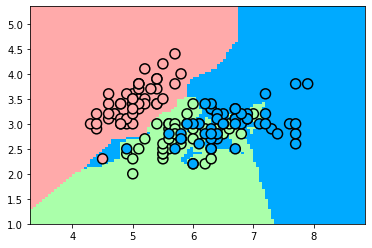

In [47]:
k = 3

y_pred = knn_weighted(x_train, y_train, x_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

xx, yy = get_grid(data, eps=.05)
predicted = np.array(knn_weighted(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)).reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])

plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=target, s=100, cmap=cmap_light, edgecolors='black', linewidth=1.5)
plt.show()

Точность алгоритма при k = 5: 0.867


<ipython-input-48-f63f4b0e7eea>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)


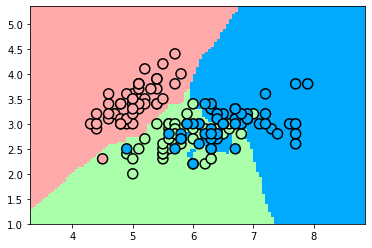

In [48]:
k = 5

y_pred = knn_weighted(x_train, y_train, x_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

xx, yy = get_grid(data, eps=.05)
predicted = np.array(knn_weighted(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)).reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])

plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=target, s=100, cmap=cmap_light, edgecolors='black', linewidth=1.5)
plt.show()

Точность алгоритма при k = 10: 0.833


<ipython-input-49-2cc4703b72e4>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)


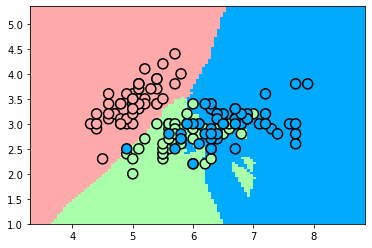

In [49]:
k = 10

y_pred = knn_weighted(x_train, y_train, x_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

xx, yy = get_grid(data, eps=.05)
predicted = np.array(knn_weighted(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)).reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])

plt.pcolormesh(xx, yy, predicted, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=target, s=100, cmap=cmap_light, edgecolors='black', linewidth=1.5)
plt.show()